In [1]:
import sys, os, h5py
import numpy as np
import pandas as pd
from numpy import genfromtxt  
import nibabel as nb
import seaborn as sns
import matplotlib.pyplot as plt
from brainspace.mesh import mesh_elements
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
from brainstat.mesh.data import mesh_smooth
import plot_funcs


### variance explained by the gradients of functional connectivity

### lef hemisphere, first 10 gradients

In [2]:
ddir = '../data/tout_group/'

# get Gradients
h2  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');
eig_val_MAIN = np.array(h2['lambdas_'])
# percentage of varience per eigenvector
perc_var_MAIN = eig_val_MAIN / np.sum(eig_val_MAIN)*100


In [3]:
eig_val_MAIN.shape

(10,)

In [4]:
perc_var_MAIN

array([42.61009138, 15.35540418, 11.26385277,  8.13270572,  6.07259092,
        4.51763478,  4.04791629,  2.92742238,  2.75866936,  2.31371222])

### left hemisphere, first 1000 gradients

In [5]:
ddir = '../data/tout_group/'

# get Gradients
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left_lambdas.h5'), 'r');
eig_val = np.array(h1['lambdas_'])
# percentage of varience per eigenvector
perc_var = eig_val / np.sum(eig_val)*100


In [6]:
perc_var[0:10]

array([23.60520393,  8.8411861 ,  6.46484357,  4.68641493,  3.48788834,
        2.58731012,  2.32746842,  1.69268623,  1.5841458 ,  1.32892144])

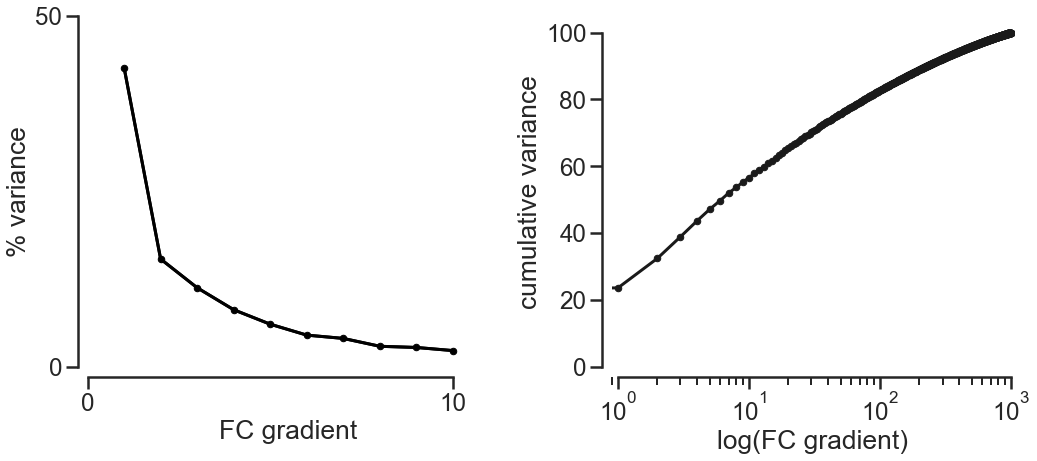

In [7]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
nums = np.arange(10)
nums = nums +1 
plt.plot(nums, perc_var_MAIN, color='black')
plt.plot(nums, perc_var_MAIN, color='black', marker='.', markersize=13)
plt.xlim([0.5, 11])
plt.xticks([0, 10])
plt.ylim([0, 50])
plt.yticks([0, 50])
plt.ylabel('% variance')
plt.xlabel('FC gradient')

ax2 = fig.add_subplot(122)
vals = np.cumsum(perc_var)
vals = np.hstack((0,vals))
ax2.semilogx(vals, marker='.', color='k', markersize=13)
plt.ylim([0, 105])
plt.xlim([0.9, 1050])
plt.ylabel('cumulative variance')
plt.xlabel('log(FC gradient)')


sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()

#fig.savefig('../figures/variance_10_1000_grads.svg', dpi=200)


### right hemisphere, first 10 gradients

In [8]:
ddir = '../data/tout_group/'

# get Gradients
h2  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_right.h5'), 'r');
eig_val_MAIN = np.array(h2['lambdas_'])
# percentage of varience per eigenvector
perc_var_MAIN = eig_val_MAIN / np.sum(eig_val_MAIN)*100


In [9]:
perc_var_MAIN.shape

(10,)

In [10]:
perc_var_MAIN

array([45.66673211, 13.35257185, 10.61821743,  7.85257595,  5.80638543,
        4.90961826,  4.02240543,  2.91460986,  2.53959763,  2.31728605])

### right hemisphere, first 1000 gradients

In [11]:
ddir = '../data/tout_group/'

# get Gradients
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_right_lambdas.h5'), 'r');
eig_val = np.array(h1['lambdas_'])

# percentage of varience per eigenvector
perc_var = eig_val / np.sum(eig_val)*100


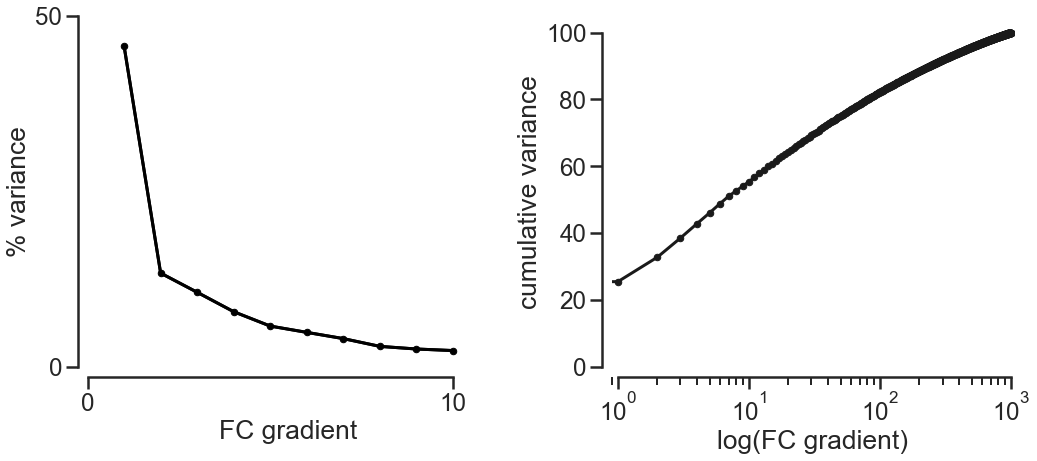

In [12]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
nums = np.arange(10)
nums = nums +1 
plt.plot(nums, perc_var_MAIN, color='black')
plt.plot(nums, perc_var_MAIN, color='black', marker='.', markersize=13)
plt.xlim([0.5, 11])
plt.xticks([0, 10])
plt.ylim([0, 50])
plt.yticks([0, 50])
plt.ylabel('% variance')
plt.xlabel('FC gradient')

ax2 = fig.add_subplot(122)
vals = np.cumsum(perc_var)
vals = np.hstack((0,vals))
ax2.semilogx(vals, marker='.', color='k', markersize=13)
plt.ylim([0, 105])
plt.xlim([0.9, 1050])
plt.ylabel('cumulative variance')
plt.xlabel('log(FC gradient)')


sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()

#fig.savefig('../figures/variance_10_1000_grads_right.svg', dpi=200)



### network level distributions of anterior and posterior hippocamapal FC

In [7]:
# get Yeo & Krienen labels
yeo_L_file = '../data/tout_group/lh.Yeo2011_7Networks_N1000_32k.label.gii'
yeo_R_file = '../data/tout_group/rh.Yeo2011_7Networks_N1000_32k.label.gii'

yeo_L = nb.load(yeo_L_file).agg_data()
yeo_R = nb.load(yeo_R_file).agg_data()

yeo = np.concatenate((yeo_L, yeo_R))

yeo.shape


(64984,)

#### compute r-values (projections of anterior-posterior G1 (fc) on cortex)

In [8]:
ddir = '../data/tout_group/'

# read-in primary and seconardy gradients (G1 & G2) for individual subfields
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');

G1_fc_LSUB = np.array(h1['gradients_'][0:1024,0])
G1_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,0])
G1_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,0])


In [9]:
gdir = '../data/tout_group/'

fcfile = os.path.join(gdir, 'Hmean709_FC_left.h5')
f = h5py.File(fcfile, 'r')
fcon_LSUB = np.array(f['data'][0:1024,:])
fcon_LCA  = np.array(f['data'][1024:1024+2048,:])
fcon_LDG  = np.array(f['data'][1024+2048:1024+1024+2048,:])

fcon_LSUB.shape, fcon_LCA.shape, fcon_LDG.shape

((1024, 360), (2048, 360), (1024, 360))

In [10]:
# correlations between G1 (fc) of subfields and subfield-isocortex fc
r1_LSUB = np.zeros((360,))
r1_LCA  = np.zeros((360,))
r1_LDG = np.zeros((360,))

for k in range(0, 360):
    r1_LSUB[k] = np.corrcoef(fcon_LSUB.T[k,:], G1_fc_LSUB)[-1:,:-1][0,0]
    r1_LCA[k]  = np.corrcoef(fcon_LCA.T[k,:], G1_fc_LCA)[-1:,:-1][0,0]
    r1_LDG[k]  = np.corrcoef(fcon_LDG.T[k,:], G1_fc_LDG)[-1:,:-1][0,0]


In [11]:
# surfaces
surf_lh, surf_rh = load_conte69()

# labeling
labeling_file = '../data/tout_group/glasser.csv' 
labeling = genfromtxt(labeling_file)

# medial wall mask
mask = labeling != 0 
mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False


In [12]:
# map r-values to the isocortex

r1_LSUB_labeled = map_to_labels(r1_LSUB, labeling, mask=mymask) 
r1_LSUB_labeled[np.where(mymask == False)] = np.nan

r1_LCA_labeled = map_to_labels(r1_LCA, labeling, mask=mymask) 
r1_LCA_labeled[np.where(mymask == False)] = np.nan


r1_LDG_labeled = map_to_labels(r1_LDG, labeling, mask=mymask) 
r1_LDG_labeled[np.where(mymask == False)] = np.nan


### SUB (left)

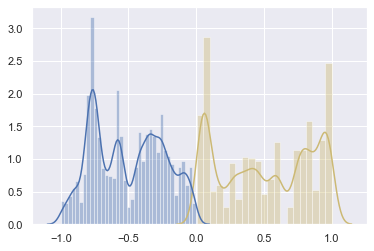

In [13]:
# distribute the negative and positive r-values for subiculum-cortex G1 projections
t1_LSUB = r1_LSUB_labeled.copy()
t1_LSUB = np.interp(t1_LSUB, (np.nanmin(t1_LSUB), np.nanmax(t1_LSUB)), (-1, 1))

t1_LSUB_top = t1_LSUB.copy()
t1_LSUB_dow = t1_LSUB.copy()

t1_LSUB_top[t1_LSUB_top < 0] = np.nan
t1_LSUB_dow[t1_LSUB_dow > 0] = np.nan

sns.distplot(t1_LSUB_top, color='y')
sns.distplot(t1_LSUB_dow, color='b')


In [14]:
Y1_t1_LSUB_top = t1_LSUB_top[np.where(yeo==1)[0]]
Y2_t1_LSUB_top = t1_LSUB_top[np.where(yeo==2)[0]]
Y3_t1_LSUB_top = t1_LSUB_top[np.where(yeo==3)[0]]
Y4_t1_LSUB_top = t1_LSUB_top[np.where(yeo==4)[0]]
Y5_t1_LSUB_top = t1_LSUB_top[np.where(yeo==5)[0]]
Y6_t1_LSUB_top = t1_LSUB_top[np.where(yeo==6)[0]]
Y7_t1_LSUB_top = t1_LSUB_top[np.where(yeo==7)[0]]

Y1_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==1)[0]]
Y2_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==2)[0]]
Y3_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==3)[0]]
Y4_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==4)[0]]
Y5_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==5)[0]]
Y6_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==6)[0]]
Y7_t1_LSUB_dow = t1_LSUB_dow[np.where(yeo==7)[0]]

In [15]:
df_LSUB = pd.DataFrame(index  = ['top', 'down'], 
                       columns = ['yeo1', 'yeo2', 'yeo3',
                                'yeo4', 'yeo5', 'yeo6', 'yeo7'])

df_LSUB.at['top', 'yeo1'] = np.nanmean(Y1_t1_LSUB_top)
df_LSUB.at['top', 'yeo2'] = np.nanmean(Y2_t1_LSUB_top)
df_LSUB.at['top', 'yeo3'] = np.nanmean(Y3_t1_LSUB_top)
df_LSUB.at['top', 'yeo4'] = np.nanmean(Y4_t1_LSUB_top)
df_LSUB.at['top', 'yeo5'] = np.nanmean(Y5_t1_LSUB_top)
df_LSUB.at['top', 'yeo6'] = np.nanmean(Y6_t1_LSUB_top)
df_LSUB.at['top', 'yeo7'] = np.nanmean(Y7_t1_LSUB_top)

df_LSUB.at['down', 'yeo1'] = -1 * np.nanmean(Y1_t1_LSUB_dow)
df_LSUB.at['down', 'yeo2'] = -1 * np.nanmean(Y2_t1_LSUB_dow)
df_LSUB.at['down', 'yeo3'] = -1 * np.nanmean(Y3_t1_LSUB_dow)
df_LSUB.at['down', 'yeo4'] = -1 * np.nanmean(Y4_t1_LSUB_dow)
df_LSUB.at['down', 'yeo5'] = -1 * np.nanmean(Y5_t1_LSUB_dow)
df_LSUB.at['down', 'yeo6'] = -1 * np.nanmean(Y6_t1_LSUB_dow)
df_LSUB.at['down', 'yeo7'] = -1 * np.nanmean(Y7_t1_LSUB_dow)

df_LSUB = pd.DataFrame({'group': df_LSUB.columns,
                   'var1':   df_LSUB.loc['top'],
                   'var2':   df_LSUB.loc['down'] })

df_LSUB

,group,var1,var2
yeo1,yeo1,0.0787066,0.306709
yeo2,yeo2,0.224898,0.617757
yeo3,yeo3,0.493663,0.280168
yeo4,yeo4,0.64699,0.338454
yeo5,yeo5,0.384868,0.627182
yeo6,yeo6,0.65788,0.270944
yeo7,yeo7,0.367373,0.608358


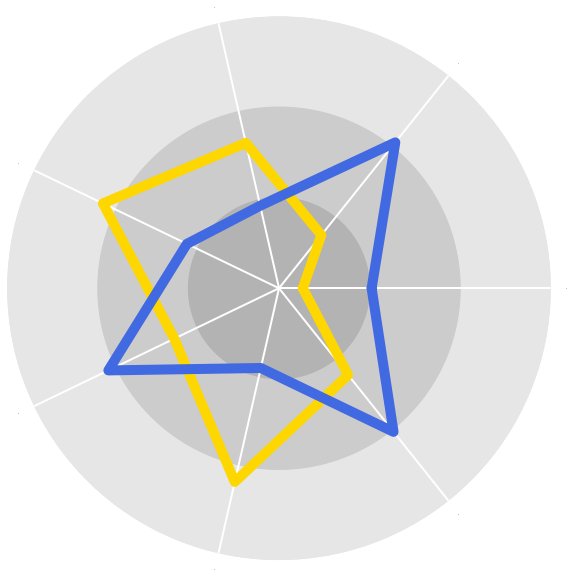

In [16]:
fig = plot_funcs.make_spider_fcon(df_LSUB, 'var1', 'var2')

#fig.savefig('../figures/spider_G1FC_LSUB.svg', dpi=200)

### CA (left)

In [17]:
t1_LCA = r1_LCA_labeled.copy()
t1_LCA = np.interp(t1_LCA, (np.nanmin(t1_LCA), np.nanmax(t1_LCA)), (-1, 1))

t1_LCA_top = t1_LCA.copy()
t1_LCA_dow = t1_LCA.copy()

t1_LCA_top[t1_LCA_top < 0] = np.nan
t1_LCA_dow[t1_LCA_dow > 0] = np.nan

Y1_t1_LCA_top = t1_LCA_top[np.where(yeo==1)[0]]
Y2_t1_LCA_top = t1_LCA_top[np.where(yeo==2)[0]]
Y3_t1_LCA_top = t1_LCA_top[np.where(yeo==3)[0]]
Y4_t1_LCA_top = t1_LCA_top[np.where(yeo==4)[0]]
Y5_t1_LCA_top = t1_LCA_top[np.where(yeo==5)[0]]
Y6_t1_LCA_top = t1_LCA_top[np.where(yeo==6)[0]]
Y7_t1_LCA_top = t1_LCA_top[np.where(yeo==7)[0]]


Y1_t1_LCA_dow = t1_LCA_dow[np.where(yeo==1)[0]]
Y2_t1_LCA_dow = t1_LCA_dow[np.where(yeo==2)[0]]
Y3_t1_LCA_dow = t1_LCA_dow[np.where(yeo==3)[0]]
Y4_t1_LCA_dow = t1_LCA_dow[np.where(yeo==4)[0]]
Y5_t1_LCA_dow = t1_LCA_dow[np.where(yeo==5)[0]]
Y6_t1_LCA_dow = t1_LCA_dow[np.where(yeo==6)[0]]
Y7_t1_LCA_dow = t1_LCA_dow[np.where(yeo==7)[0]]


df_LCA = pd.DataFrame(index  = ['top', 'down'], 
                       columns = ['yeo1', 'yeo2', 'yeo3',
                                'yeo4', 'yeo5', 'yeo6', 'yeo7'])

df_LCA.at['top', 'yeo1'] = np.nanmean(Y1_t1_LCA_top)
df_LCA.at['top', 'yeo2'] = np.nanmean(Y2_t1_LCA_top)
df_LCA.at['top', 'yeo3'] = np.nanmean(Y3_t1_LCA_top)
df_LCA.at['top', 'yeo4'] = np.nanmean(Y4_t1_LCA_top)
df_LCA.at['top', 'yeo5'] = np.nanmean(Y5_t1_LCA_top)
df_LCA.at['top', 'yeo6'] = np.nanmean(Y6_t1_LCA_top)
df_LCA.at['top', 'yeo7'] = np.nanmean(Y7_t1_LCA_top)

df_LCA.at['down', 'yeo1'] = -1 * np.nanmean(Y1_t1_LCA_dow)
df_LCA.at['down', 'yeo2'] = -1 * np.nanmean(Y2_t1_LCA_dow)
df_LCA.at['down', 'yeo3'] = -1 * np.nanmean(Y3_t1_LCA_dow)
df_LCA.at['down', 'yeo4'] = -1 * np.nanmean(Y4_t1_LCA_dow)
df_LCA.at['down', 'yeo5'] = -1 * np.nanmean(Y5_t1_LCA_dow)
df_LCA.at['down', 'yeo6'] = -1 * np.nanmean(Y6_t1_LCA_dow)
df_LCA.at['down', 'yeo7'] = -1 * np.nanmean(Y7_t1_LCA_dow)



df_LCA = pd.DataFrame({'group': df_LCA.columns,
                   'var1':   df_LCA.loc['top'],
                   'var2':   df_LCA.loc['down'] })

df_LCA


,group,var1,var2
yeo1,yeo1,0.311076,0.230382
yeo2,yeo2,0.191496,0.21448
yeo3,yeo3,0.516045,0.137342
yeo4,yeo4,0.704596,0.0854602
yeo5,yeo5,0.35329,0.446674
yeo6,yeo6,0.633392,0.206741
yeo7,yeo7,0.387412,0.50021


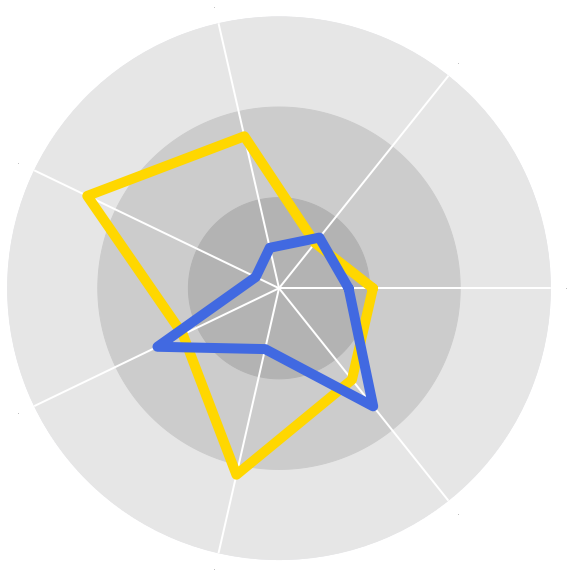

In [18]:
fig = plot_funcs.make_spider_fcon(df_LCA, 'var1', 'var2')

#fig.savefig('../figures/spider_G1FC_LCA.svg', dpi=200)



### DG (left)

In [19]:
t1_LDG = r1_LDG_labeled.copy()
t1_LDG = np.interp(t1_LDG, (np.nanmin(t1_LDG), np.nanmax(t1_LDG)), (-1, 1))

t1_LDG_top = t1_LDG.copy()
t1_LDG_dow = t1_LDG.copy()

t1_LDG_top[t1_LDG_top < 0] = np.nan
t1_LDG_dow[t1_LDG_dow > 0] = np.nan

Y1_t1_LDG_top = t1_LDG_top[np.where(yeo==1)[0]]
Y2_t1_LDG_top = t1_LDG_top[np.where(yeo==2)[0]]
Y3_t1_LDG_top = t1_LDG_top[np.where(yeo==3)[0]]
Y4_t1_LDG_top = t1_LDG_top[np.where(yeo==4)[0]]
Y5_t1_LDG_top = t1_LDG_top[np.where(yeo==5)[0]]
Y6_t1_LDG_top = t1_LDG_top[np.where(yeo==6)[0]]
Y7_t1_LDG_top = t1_LDG_top[np.where(yeo==7)[0]]


Y1_t1_LDG_dow = t1_LDG_dow[np.where(yeo==1)[0]]
Y2_t1_LDG_dow = t1_LDG_dow[np.where(yeo==2)[0]]
Y3_t1_LDG_dow = t1_LDG_dow[np.where(yeo==3)[0]]
Y4_t1_LDG_dow = t1_LDG_dow[np.where(yeo==4)[0]]
Y5_t1_LDG_dow = t1_LDG_dow[np.where(yeo==5)[0]]
Y6_t1_LDG_dow = t1_LDG_dow[np.where(yeo==6)[0]]
Y7_t1_LDG_dow = t1_LDG_dow[np.where(yeo==7)[0]]


df_LDG = pd.DataFrame(index  = ['top', 'down'], 
                       columns = ['yeo1', 'yeo2', 'yeo3',
                                'yeo4', 'yeo5', 'yeo6', 'yeo7'])

df_LDG.at['top', 'yeo1'] = np.nanmean(Y1_t1_LDG_top)
df_LDG.at['top', 'yeo2'] = np.nanmean(Y2_t1_LDG_top)
df_LDG.at['top', 'yeo3'] = np.nanmean(Y3_t1_LDG_top)
df_LDG.at['top', 'yeo4'] = np.nanmean(Y4_t1_LDG_top)
df_LDG.at['top', 'yeo5'] = np.nanmean(Y5_t1_LDG_top)
df_LDG.at['top', 'yeo6'] = np.nanmean(Y6_t1_LDG_top)
df_LDG.at['top', 'yeo7'] = np.nanmean(Y7_t1_LDG_top)

df_LDG.at['down', 'yeo1'] = -1 * np.nanmean(Y1_t1_LDG_dow)
df_LDG.at['down', 'yeo2'] = -1 * np.nanmean(Y2_t1_LDG_dow)
df_LDG.at['down', 'yeo3'] = -1 * np.nanmean(Y3_t1_LDG_dow)
df_LDG.at['down', 'yeo4'] = -1 * np.nanmean(Y4_t1_LDG_dow)
df_LDG.at['down', 'yeo5'] = -1 * np.nanmean(Y5_t1_LDG_dow)
df_LDG.at['down', 'yeo6'] = -1 * np.nanmean(Y6_t1_LDG_dow)
df_LDG.at['down', 'yeo7'] = -1 * np.nanmean(Y7_t1_LDG_dow)

df_LDG = pd.DataFrame({'group': df_LDG.columns,
                   'var1':   df_LDG.loc['top'],
                   'var2':   df_LDG.loc['down'] })

df_LDG


,group,var1,var2
yeo1,yeo1,0.592041,0.193303
yeo2,yeo2,0.31105,0.0741325
yeo3,yeo3,0.729151,0.0599306
yeo4,yeo4,0.784485,0.0223198
yeo5,yeo5,0.369979,0.482558
yeo6,yeo6,0.756763,0.221055
yeo7,yeo7,0.437548,0.410877


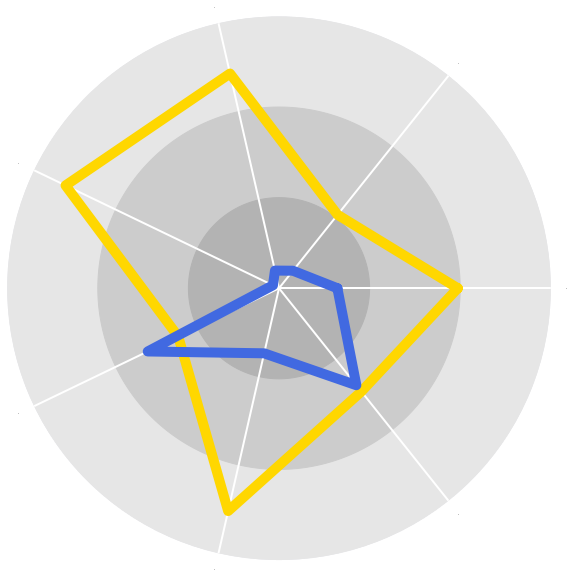

In [20]:
fig = plot_funcs.make_spider_fcon(df_LDG, 'var1', 'var2')

#fig.savefig('../figures/spider_G1FC_LDG.svg', dpi=200)


# Significance of heritability of subfield fc gradients

In [21]:
# function for fdr corrections
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)
    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()
    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    return pID, pN


### SUB (left), heritability of functional gradients

In [22]:
# read-in heritability scores from 1024 LSUB vertices
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [23]:
fnameLSUB = '../solar/FC_G1_LSUB/G1_LSUB_results_herit.txt'

herit_g1_LSUB = pd.read_csv(fnameLSUB, index_col = 0, header = 0)
herit_g1_LSUB.index.name = 'node'

df_herit_g1_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):
    iA = herit_g1_LSUB.index.get_loc(nodeID)
    iB = df_herit_g1_LSUB.index.get_loc(nodeID)
    
    df_herit_g1_LSUB.iloc[iB]['H2r'] = herit_g1_LSUB.iloc[iA]['H2r']
    df_herit_g1_LSUB.iloc[iB]['rp']  = herit_g1_LSUB.iloc[iA]['rp']

sorted_herit_g1_LSUB = np.array(df_herit_g1_LSUB['H2r'], dtype = 'float')
sorted_pvals_g1_LSUB = np.array(df_herit_g1_LSUB['rp'], dtype = 'float')


q = 0.05
pID, pN = FDR_sofie(sorted_pvals_g1_LSUB, q)

pID

0.018481

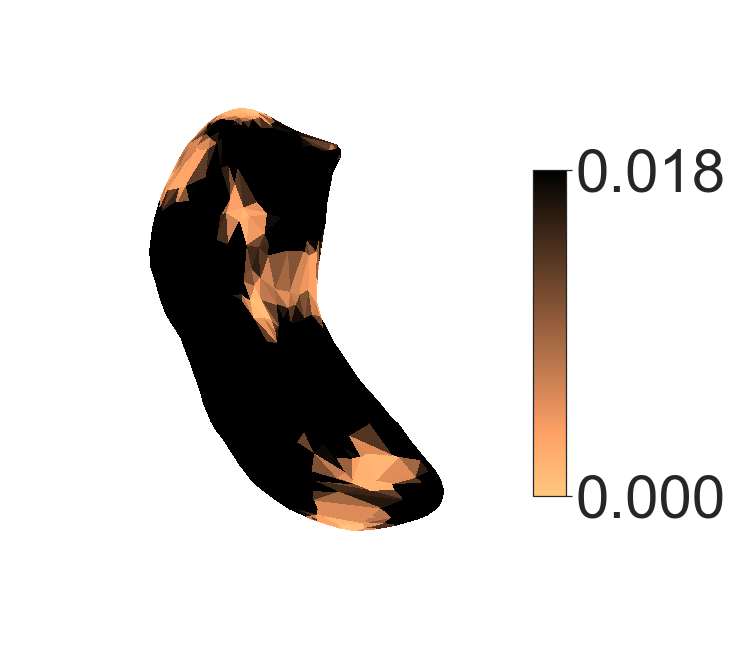

In [24]:
fig  = plot_funcs.plot_surf_upper3(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   sorted_pvals_g1_LSUB,
                                   'copper_r',
                                   0, pID)

#fig.savefig('../figures/FC_G1_LSUB_herit_pvalues.svg', dpi=300)

In [25]:
fnameLSUB = '../solar/FC_G2_LSUB/G2_LSUB_results_herit.txt'

herit_g2_LSUB = pd.read_csv(fnameLSUB, index_col = 0, header = 0)
herit_g2_LSUB.index.name = 'node'

df_herit_g2_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_g2_LSUB.index.get_loc(nodeID)
    iB = df_herit_g2_LSUB.index.get_loc(nodeID)

    df_herit_g2_LSUB.iloc[iB]['H2r'] = herit_g2_LSUB.iloc[iA]['H2r']
    df_herit_g2_LSUB.iloc[iB]['rp']  = herit_g2_LSUB.iloc[iA]['rp']

sorted_herit_g2_LSUB = np.array(df_herit_g2_LSUB['H2r'], dtype = 'float')
sorted_pvals_g2_LSUB = np.array(df_herit_g2_LSUB['rp'], dtype = 'float')

## there is no voxel surviving at q=0.05 !!!
q = 0.5
pID, pN = FDR_sofie(sorted_pvals_g2_LSUB, q)

pID

0.3836047

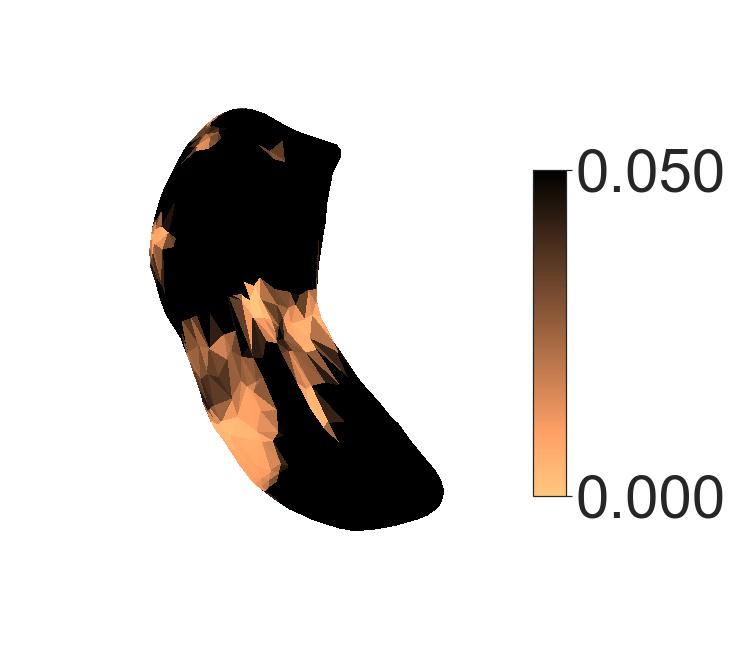

In [26]:
fig  = plot_funcs.plot_surf_upper3(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   sorted_pvals_g2_LSUB,
                                   'copper_r',
                                   0, 0.05)

#fig.savefig('../figures/FC_G2_LSUB_herit_pvalues.svg', dpi=300)

### CA (left), heritability of functional gradients

In [27]:
tot_node_num_lca = 2048
node_str = []
for i in range(1, tot_node_num_lca+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

2048


(1, '...', 2048)

In [28]:
fnameLCA = '../solar/FC_G1_LCA/G1_LCA_results_herit.txt'

herit_g1_LCA = pd.read_csv(fnameLCA, index_col = 0, header = 0)
herit_g1_LCA.index.name = 'node'

df_herit_g1_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lca+1):
    iA = herit_g1_LCA.index.get_loc(nodeID)
    iB = df_herit_g1_LCA.index.get_loc(nodeID)
    
    df_herit_g1_LCA.iloc[iB]['H2r'] = herit_g1_LCA.iloc[iA]['H2r']
    df_herit_g1_LCA.iloc[iB]['rp']  = herit_g1_LCA.iloc[iA]['rp']

sorted_herit_g1_LCA = np.array(df_herit_g1_LCA['H2r'], dtype = 'float')
sorted_pvals_g1_LCA = np.array(df_herit_g1_LCA['rp'], dtype = 'float')

## there is no voxel surviving at q=0.05 !!!
q = 0.5
pID, pN = FDR_sofie(sorted_pvals_g1_LCA, q)

pID

0.3570481

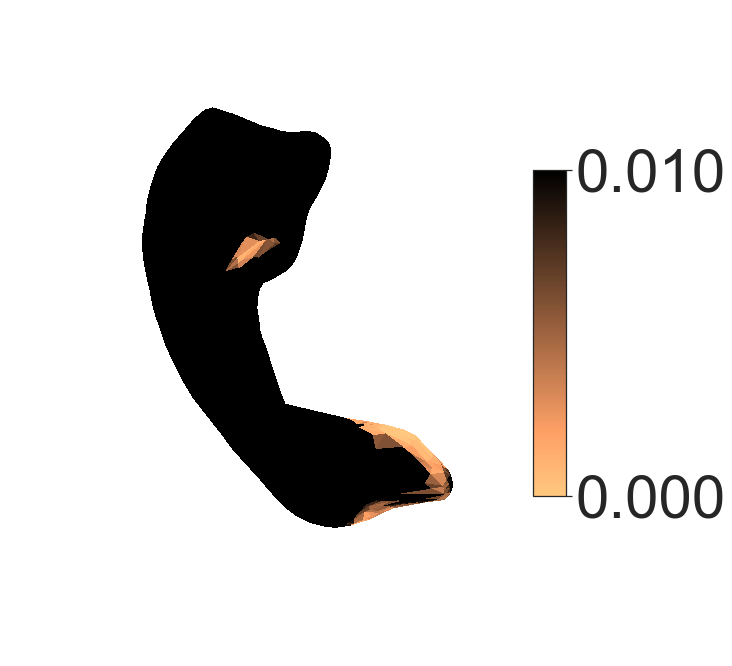

In [29]:
fig  = plot_funcs.plot_surf_upper3(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   sorted_pvals_g1_LCA,
                                   'copper_r',
                                   0, 0.01)

#fig.savefig('../figures/FC_G1_LCA_herit_pvalues.svg', dpi=300)

In [30]:
fnameLCA = '../solar/FC_G2_LCA/G2_LCA_results_herit.txt'

herit_g2_LCA = pd.read_csv(fnameLCA, index_col = 0, header = 0)
herit_g2_LCA.index.name = 'node'

df_herit_g2_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lca+1):
    iA = herit_g2_LCA.index.get_loc(nodeID)
    iB = df_herit_g2_LCA.index.get_loc(nodeID)
    
    df_herit_g2_LCA.iloc[iB]['H2r'] = herit_g2_LCA.iloc[iA]['H2r']
    df_herit_g2_LCA.iloc[iB]['rp']  = herit_g2_LCA.iloc[iA]['rp']

sorted_herit_g2_LCA = np.array(df_herit_g2_LCA['H2r'], dtype = 'float')
sorted_pvals_g2_LCA = np.array(df_herit_g2_LCA['rp'], dtype = 'float')

## there is no voxel surviving at q=0.05 !!!
q = 0.05
pID, pN = FDR_sofie(sorted_pvals_g2_LCA, q)

pID

0.0005759

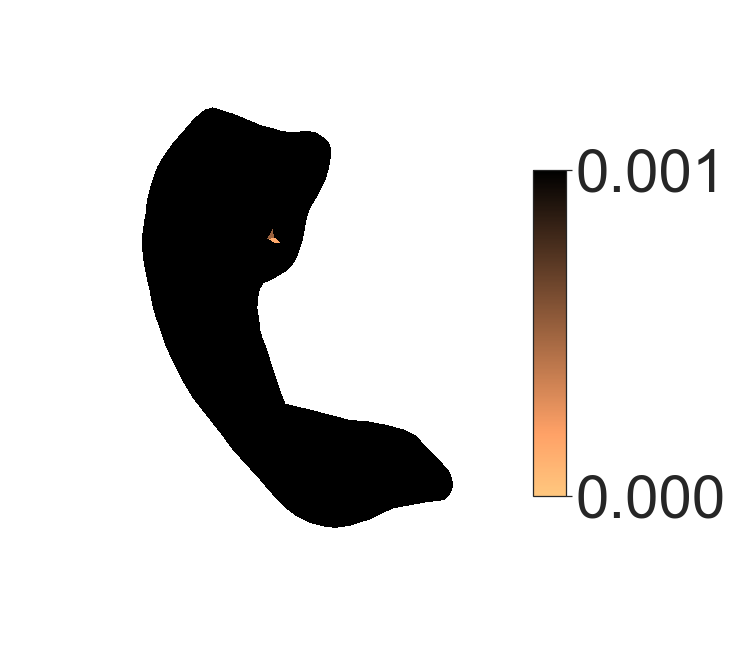

In [31]:
fig  = plot_funcs.plot_surf_upper3(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   sorted_pvals_g2_LCA,
                                   'copper_r',
                                   0, pID)

#fig.savefig('../figures/FC_G2_LCA_herit_pvalues.svg', dpi=300)

### DG (left), heritability of functional gradients

In [32]:
tot_node_num_ldg = 1024
node_str = []
for i in range(1, tot_node_num_ldg+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [33]:
fnameLDG = '../solar/FC_G1_LDG/G1_LDG_results_herit.txt'

herit_g1_LDG = pd.read_csv(fnameLDG, index_col = 0, header = 0)
herit_g1_LDG.index.name = 'node'

df_herit_g1_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_ldg+1):
    iA = herit_g1_LDG.index.get_loc(nodeID)
    iB = df_herit_g1_LDG.index.get_loc(nodeID)
    
    df_herit_g1_LDG.iloc[iB]['H2r'] = herit_g1_LDG.iloc[iA]['H2r']
    df_herit_g1_LDG.iloc[iB]['rp']  = herit_g1_LDG.iloc[iA]['rp']

sorted_herit_g1_LDG = np.array(df_herit_g1_LDG['H2r'], dtype = 'float')
sorted_pvals_g1_LDG = np.array(df_herit_g1_LDG['rp'], dtype = 'float')

## there is no voxel surviving at q=0.05 !!!
q = 0.8
pID, pN = FDR_sofie(sorted_pvals_g1_LDG, q)

pID

0.5

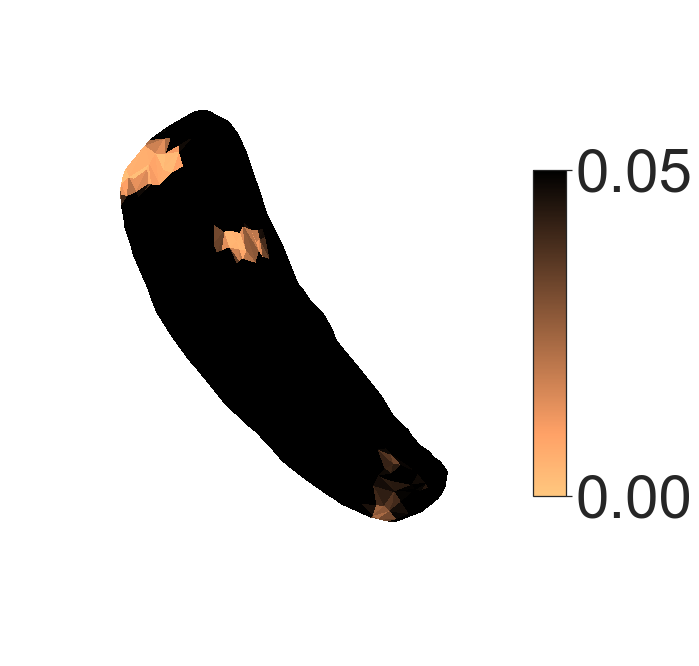

In [34]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   sorted_pvals_g1_LDG,
                                   'copper_r',
                                   0, 0.05)

#fig.savefig('../figures/FC_G1_LDG_herit_pvalues.svg', dpi=300)

In [35]:
fnameLDG = '../solar/FC_G2_LDG/G2_LDG_results_herit.txt'

herit_g2_LDG = pd.read_csv(fnameLDG, index_col = 0, header = 0)
herit_g2_LDG.index.name = 'node'

df_herit_g2_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_ldg+1):
    iA = herit_g2_LDG.index.get_loc(nodeID)
    iB = df_herit_g2_LDG.index.get_loc(nodeID)
    
    df_herit_g2_LDG.iloc[iB]['H2r'] = herit_g2_LDG.iloc[iA]['H2r']
    df_herit_g2_LDG.iloc[iB]['rp']  = herit_g2_LDG.iloc[iA]['rp']

sorted_herit_g2_LDG = np.array(df_herit_g2_LDG['H2r'], dtype = 'float')
sorted_pvals_g2_LDG = np.array(df_herit_g2_LDG['rp'], dtype = 'float')

## there is no voxel surviving at q=0.05 !!!
q = 0.8
pID, pN = FDR_sofie(sorted_pvals_g2_LDG, q)

pID

0.5

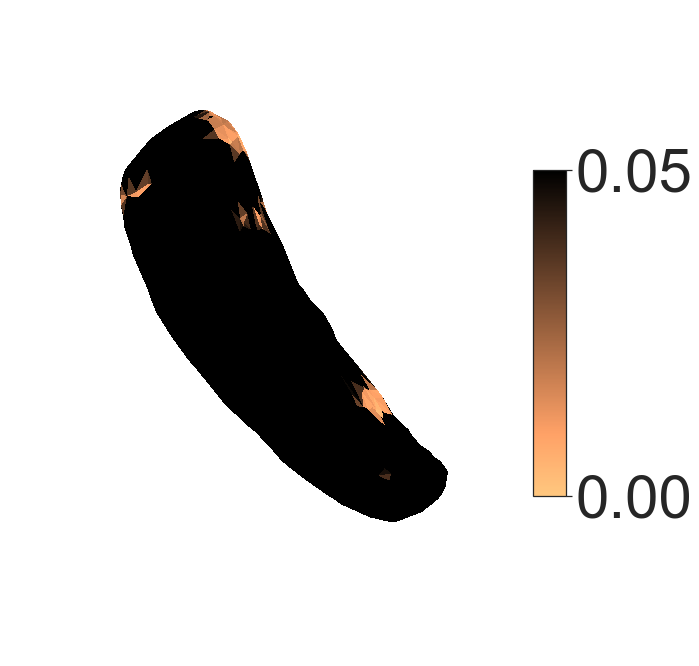

In [36]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   sorted_pvals_g2_LDG,
                                   'copper_r',
                                   0, 0.05)


fig.savefig('../figures/FC_G2_LDG_herit_pvalues.svg', dpi=300)